# Assignment 1

In [1]:
# Import dua modul untuk analisis data
import numpy as np
import pandas as pd

In [2]:
# Impor set data london crime menggunakan pandas read_csv
df = pd.read_csv('london_crime_by_lsoa.csv')

# Display data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
# Informasi dasar tentang kerangka data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
# Dimensi dataframe
df.shape

(13490604, 7)

In [5]:
# Banyaknya objek null
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
# Menghapus kolom yang tidak perlu
df.drop(['lsoa_code'], axis=1, inplace=True)
df.head(2)

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11


In [7]:
# Ringkasan singkat dari setiap kolom
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [8]:
# Describe only string coloumns
df.describe(include=[object])

,borough,major_category,minor_category
count,13490604,13490604,13490604
unique,33,9,32
top,Croydon,Theft and Handling,Common Assault
freq,602100,3966300,522180


## Visualisasi Dasar

In [9]:
#Import library
import matplotlib as mpl
import matplotlib.pyplot as plt

### Area Plot

Kita akan membuat area plot yang memvisualisasikan 5 wilayah teratas yang menyumbang jumlah kejahatan mayoritas: Violance Against the Person tertinggi di London selama 2008 - 2016

In [10]:
# Step 1 : Buat df baru dengan groupby kolom [borough, major_category, year] dan sum kolom value 
group = df.groupby(['borough', 'major_category', 'year'])['value'].sum().reset_index()
group.head()

,borough,major_category,year,value
0,Barking and Dagenham,Burglary,2008,1764
1,Barking and Dagenham,Burglary,2009,2418
2,Barking and Dagenham,Burglary,2010,2153
3,Barking and Dagenham,Burglary,2011,2301
4,Barking and Dagenham,Burglary,2012,2435


In [11]:
# Step 2 : buat df baru dengan filter berdasarkan kondisi 
# major_category ==  Violance Against the Person dengan .loc[]
violance = group.loc[group['major_category']=='Violence Against the Person']
violance.head()

,borough,major_category,year,value
72,Barking and Dagenham,Violence Against the Person,2008,4995
73,Barking and Dagenham,Violence Against the Person,2009,5074
74,Barking and Dagenham,Violence Against the Person,2010,4545
75,Barking and Dagenham,Violence Against the Person,2011,3934
76,Barking and Dagenham,Violence Against the Person,2012,3734


In [12]:
# Step 3 : Buat df baru dengan year sebagai index, tiap borough sebagai kolom dengan .pivot()
pivot = violance.pivot(index='year', columns='borough', values='value')
pivot

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,4995,4836,3271,5690,5231,5899,0,6761,7155,3767,...,3570,6808,3817,1870,7993,2550,5423,5367,4820,6697
2009,5074,4730,3614,6386,5214,5540,0,6873,7269,4172,...,3378,6773,3865,2012,7870,2646,5455,5641,5004,7053
2010,4545,4435,3180,6525,4674,5890,0,6432,8097,4185,...,2899,6784,3825,2180,7439,2316,5624,5372,4860,7127
2011,3934,4127,2726,6804,4520,5556,14,6554,7100,4074,...,2535,6147,3599,1886,6205,2325,5182,4938,3951,7432
2012,3734,3942,2744,6395,4143,5117,15,6555,6850,4231,...,2530,6615,4115,2056,6471,2657,6004,4944,4111,7130
2013,3889,4292,2714,5997,4207,4551,14,6186,6285,4516,...,2464,6154,4238,1910,6254,2375,6313,5173,4000,6887
2014,4965,5799,3346,7691,5512,5687,18,8248,7393,5965,...,3023,7880,5667,2384,7771,3130,7555,6141,5386,8432
2015,5888,6905,3939,8485,6608,7146,28,9880,8947,6717,...,3897,9414,5893,2861,8879,3696,8829,6913,6924,9856
2016,6067,7499,4503,9205,6650,7626,25,10302,9396,7409,...,4026,9646,6411,3155,9474,3714,9608,7409,6809,10834


In [13]:
# Step 4 : Sort violance untuk mengetahui 5 wilayah teratas
violance.sort_values(['value'], ascending=False, axis=0, inplace=True)

# buat df baru berisi 10 violance teratas 
violance_top5 = violance.head(10)
violance_top5

C:\Users\ACER\AppData\Local\Temp\ipykernel_6548\2046015793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violance.sort_values(['value'], ascending=False, axis=0, inplace=True)


,borough,major_category,year,value
2654,Westminster,Violence Against the Person,2016,10834
1763,Lambeth,Violence Against the Person,2016,10496
1762,Lambeth,Violence Against the Person,2015,10491
629,Croydon,Violence Against the Person,2016,10302
628,Croydon,Violence Against the Person,2015,9880
2653,Westminster,Violence Against the Person,2015,9856
2006,Newham,Violence Against the Person,2016,9646
2411,Tower Hamlets,Violence Against the Person,2016,9608
2249,Southwark,Violence Against the Person,2016,9474
2005,Newham,Violence Against the Person,2015,9414


Berdasarkan data hasil sort diketahui 5 wilayah dengan jumlah kejahatan Violance Against the Person tertinggi adalah: Westminster, Lambeth, Croydon, Newham, dan Tower Hamlets.

In [14]:
# Step 5 : slice pivot sesuai dengan 5 wilayah teratas agar lebih mudah untuk divisualisasikan
pivot_top = pivot.loc[:, ['Westminster', 'Lambeth', 'Croydon', 'Newham', 'Tower Hamlets']]
pivot_top

borough,Westminster,Lambeth,Croydon,Newham,Tower Hamlets
year,,,,,
2008,6697,7399,6761,6808,5423
2009,7053,7297,6873,6773,5455
2010,7127,7412,6432,6784,5624
2011,7432,6914,6554,6147,5182
2012,7130,6903,6555,6615,6004
2013,6887,6861,6186,6154,6313
2014,8432,8953,8248,7880,7555
2015,9856,10491,9880,9414,8829
2016,10834,10496,10302,9646,9608


Text(0, 0.5, 'Number of Crime')

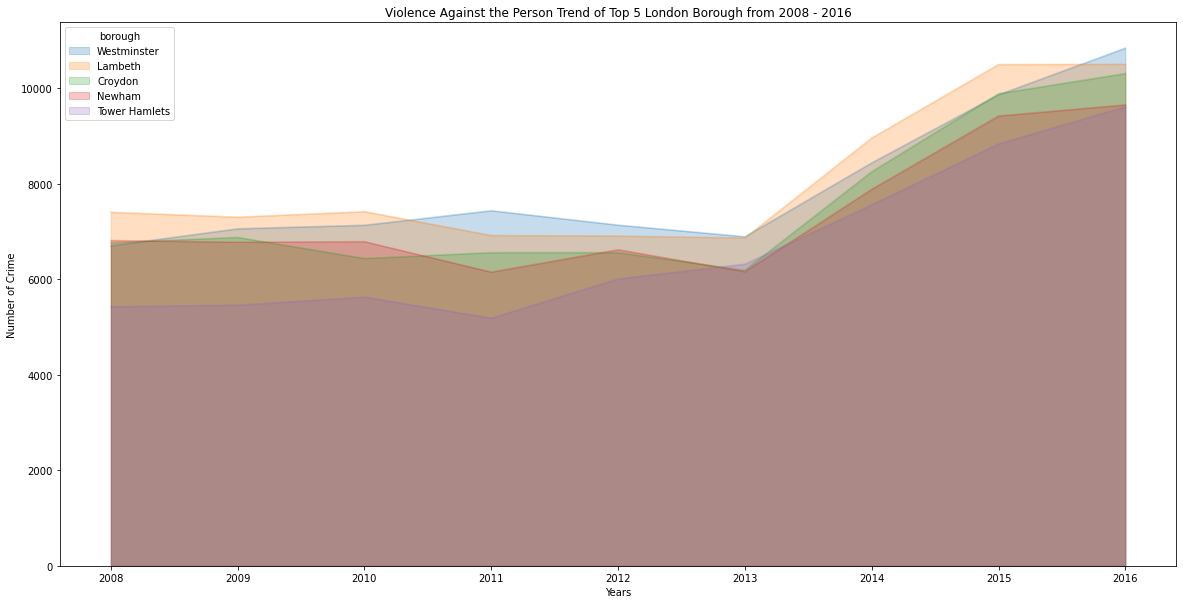

In [15]:
# Step 6 : Visualisasikan pivot_top
ax = pivot_top.plot(kind='area', alpha=0.25, stacked=False, figsize=(20, 10))
ax.set_title('Violence Against the Person Trend of Top 5 London Borough from 2008 - 2016')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Crime')

Interpretasi:
Berdasarkan hasil area plot dapat dilihat bahwa kelima wilayah dengan kejahatan Violance Against the Person memiliki jumlah kejahatan yang tidak berselisih jauh, terutama pada tahun 2016 yang berkisar antara 8000-10.000. Westminster merupakan wilayah dengan jumlah kejahatan Violance Against the Person tertinggi pada tahun 2016, meningkat 9,92% dibanding tahun sebelumnya. Sedangkan Lambeth yang memegang jumlah kejahatan Violance Against tertinggi pada tahun lalu justru mengalami penurunan sebesar 0.04% di tahun 2016. Dari kelima wilayah hanya Lambeth yang mengalami penurunan jumlah kejahatan dibanding tahun sebelumnya.

### Line Plot

Kita akan menggunakan dataframe yang sama yaitu pivot_top untuk melihat 5 wilayah dengan kejahatan mayoritas : Vilance Against the Person tertinggi di London selama 2008 - 2016 dengan menggunakan Line plot.

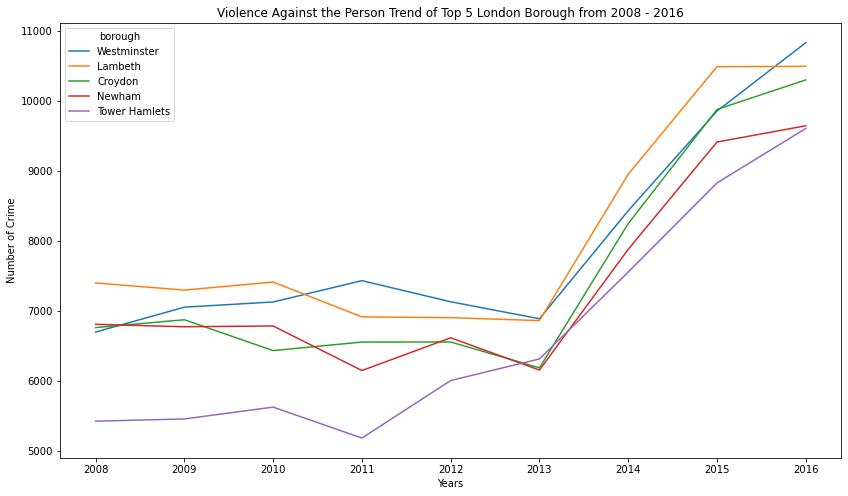

In [16]:
# Dengan menggunakan data sebelumnya mari kita coba membuat line plots
pivot_top.plot(kind='line',
               figsize=(14, 8))

plt.title('Violence Against the Person Trend of Top 5 London Borough from 2008 - 2016')
plt.xlabel('Years')
plt.ylabel('Number of Crime')

plt.show()

Interpretasi: Hasil visualisasi dengan menggunakan line plot menghasilkan kesimpulan yang sama dengan area plot, namun dapat dilihat dengan lebih jelas pada line plot bahwa jumlah kejahatan Violance Against the Person terendah terjadi pada tahun 2011 di wilayah Tower Hamlets. Setelah tahun 2013 kejahatan ini cenderung menunjukkan tren yang meningkat setiap tahunnya. 

### Histogram

Kita akan membuat histogram plot yang merepresentasikan distribusi frekuensi jumlah kejahatan berdasarkan beberapa minor_category di London selama 2008 - 2016.

In [17]:
# Step 1 : Buat df baru dengan groupby kolom [year, major_category, year] dan sum kolom value 
group2 = df.groupby(['year', 'minor_category'])['value'].sum().reset_index()
group2.head()

,year,minor_category,value
0,2008,Assault with Injury,56586
1,2008,Burglary in Other Buildings,31437
2,2008,Burglary in a Dwelling,56655
3,2008,Business Property,2964
4,2008,Common Assault,37356


In [18]:
# Step 2 : pivot group untuk mengubah minor_category menjadi kolom dan year sebagai index
pivot2 = group2.pivot(index='year', columns='minor_category', values='value')
pivot2

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151,...,44964,7628,27311,45755,0,63509,36441,20377,18708,15526
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830,...,30957,7785,20508,40309,0,52167,40141,21653,17186,21556
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395,...,33829,9501,19665,36097,0,50024,42549,21848,16513,23431
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392,...,34868,10588,20874,35203,0,51319,46957,26366,18001,23525


Misal kita ingin membandingkan distribusi frekuensi dari jumlah kejahatan minor : Business Property, Other Theft Person, Common Assault

In [19]:
# Step 3 : slice pivot sesuai dengan 3 jenis kejahatan minor yang ingin divisualisasikan
minor_ = pivot2.loc[:, ['Business Property', 'Other Theft Person', 'Common Assault']]
minor_

minor_category,Business Property,Other Theft Person,Common Assault
year,,,
2008,2964,24453,37356
2009,3115,27549,39671
2010,3041,29547,41591
2011,2685,36090,40502
2012,2450,46585,39246
2013,2026,44964,37882
2014,1642,30957,51244
2015,1718,33829,61758
2016,1654,34868,64440


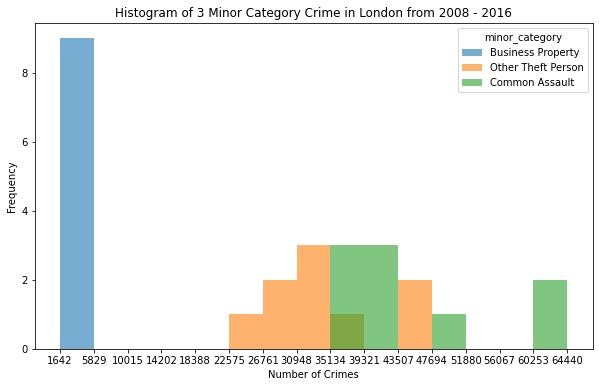

In [20]:
# Step 5 : Visualisasikan
count, bin_edges = np.histogram(minor_, 15)
# unstacked hist
minor_.plot(kind='hist', figsize=(10, 6),
          bins=15, alpha=0.6, xticks=bin_edges)

plt.title('Histogram of 3 Minor Category Crime in London from 2008 - 2016')
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')

plt.show()

Interpretasi: Berdasarkan histogram di atas, dapat diketahui sebaran datanya cenderung simetris. Dapat dilihat bahwasannya jumlah kejahatan minor: business property terbanyak pada selang 1642 - 5829 kejahatan dengan frekuensi mencapai lebih dari 8 kali.
Sedangkan untuk kategori other theft person dan common assault dapat disimpulkan bahwa jumlah kejahatan minor: other theft person dan common assault terbanyak pada selang 30948 - 43507 kejahatan dengan frekuensi sebesar 3 kali.

### Bar Chart

Kita akan memvisualisasikan 15 wilayah dengan jumlah kejahatan tertinggi dengan menggunakan horizontal bar chart. Selain itu, kita juga akan melihat tren total kejahatan di wilayah tertentu selama tahun 2008 - 2016 dengan menggunakan vertikal bar chart melalui seaborn.

In [21]:
# Step 1 : # buat df baru dengan groupby borough dan value.sum()
df_top = df[['borough', 'value']].groupby('borough').sum()
df_top

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [22]:
# Step 2 : sort value untuk mengetahui wilayah dengan total kejahatan tertinggi
df_top.sort_values(['value'], ascending=False, axis=0, inplace=True)

# buat df baru berisi 15 wilayah teratas
df_top15 = df_top.head(15)
df_top15

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


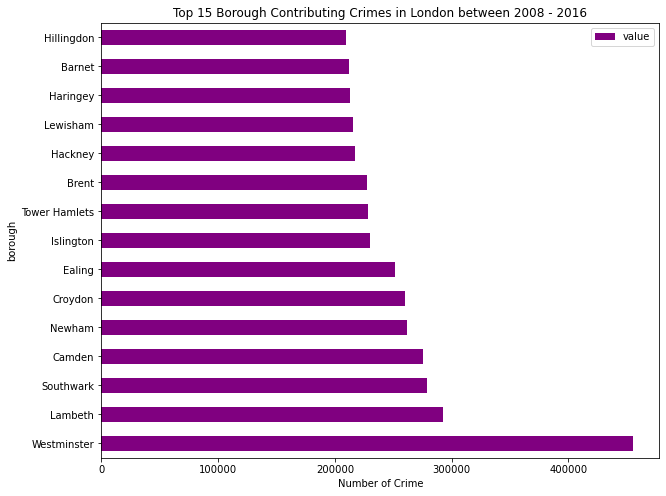

In [23]:
# Step 3 : Visualisasikan ke dalam horizontal bar chart
df_top15.plot(kind='barh', figsize=(10, 8), color='purple')
plt.xlabel('Number of Crime')
plt.title('Top 15 Borough Contributing Crimes in London between 2008 - 2016')

plt.show()

Interpretasi : Dari hasil visualisasi menunjukkan bahwa Westminster merupakan wilayah yang meyumbang total kejahatan terbanyak selama tahun 2008 - 2016 sebesar lebih dari 400.000 kejahatan. Di posisi selanjutnya ditempati oleh Lambeth, Southwark, dan Camden. Selisih jumlah kejahatan antara wilayah pertama dengan wilayah selanjutnya menunjukkan selisih yang cukup jauh sekitar 55%. 

Kita juga akan membuat vertikal bar chart dengan seaborn yang memvisualisasikan tren total kejahatan di wilayah Barnet.

In [24]:
# Import Library Seaborn as sns
import seaborn as sns

In [25]:
# Step 1 : Buat df baru dengan groupby kolom [year,borough] dan sum kolom value
df3 = df.groupby(['year', 'borough'])['value'].sum().reset_index()
df3.head()

,year,borough,value
0,2008,Barking and Dagenham,17656
1,2008,Barnet,23944
2,2008,Bexley,15305
3,2008,Brent,23504
4,2008,Bromley,24015


In [26]:
# Step 2 : buat df baru dengan filter berdasarkan kondisi 
# borough ==  Barnet dengan .loc[]
df_bar = df3.loc[df3['borough'] == 'Barnet']
df_bar

,year,borough,value
1,2008,Barnet,23944
34,2009,Barnet,23449
67,2010,Barnet,23416
100,2011,Barnet,24007
133,2012,Barnet,23573
166,2013,Barnet,22510
199,2014,Barnet,22572
232,2015,Barnet,24036
265,2016,Barnet,24684


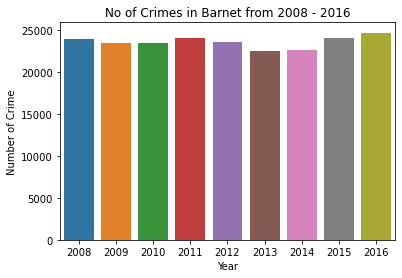

In [27]:
# Visualisasikan
sns.barplot(data=df_bar, x='year', y='value')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.title('No of Crimes in Barnet from 2008 - 2016')
plt.show()

Interpretasi: Dari hasil visualisasi menunjukkan bahwa jumlah kejahatan di wiayah Barnet, London selama tahun 2008 - 2016 menunjukkan tren yang horizontal atau cenderung datar, data bergerak meningkat di suatu waktu dan kemudian turun kembali. Jumlah kejahatan tertinggi terjadi pada tahun 2016 dengan hampir 25000 kejahatan, sedangkan jumlah kejahatan terendah terjadi pada tahun 2013 dengan sekitar 22.500 kejahatan.

### Pie Chart

Kita akan memvisualisasikan presentase kejahatan yang dikelompokkan menurut masing-masing kategori dalam major_category.

In [28]:
# Step 1 : Buat df groupby major_category dan .size() untuk mengetahui jumlah seluruh elemen major_category
df_pc = df.groupby(['major_category']).size()
df_pc

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

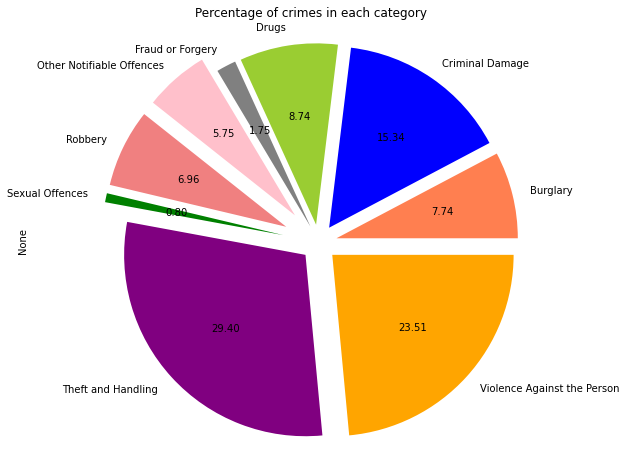

In [29]:
# Visualisasikan df_pc dengan pie chart
df_pc.plot(kind='pie',
          figsize=(10, 8),
          autopct='%.2f',
          colors=['coral', 'blue', 'yellowgreen',
                  'grey', 'pink', 'lightcoral',
                  'green', 'purple', 'orange'],
          explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1])

plt.title('Percentage of crimes in each category')
plt.axis('equal')
plt.show()

Interpretasi : Berdasarkan hasil visualisasi dengan menggunakan pie chart dapat ditarik kesimpulan bahwasanya selama tahun 2008 - 2016, Theft and Handling merupakan kategori kejahatan dengan presentase teetinggi dari seluruh wilayah London sebesar 29.40%, diikuti dengan Violance Against the Person dengan presentase sebesar 23.51%, sedangkan untuk kategori kejahatan dengan presentase terendah adalah Sex Offence sebesar 0.80%.

### Box Plot

Kita akan mencoba mencari tahun total kejahatan di wilayah Greenwich, London dari tahun 2008 - 2016 dan divisualisasikan dalam bentuk boc plot.

In [30]:
# Step 1 : Panggil df3 yang sebelumnya telah dibuat yang berisi year, borough, dan value
df3.head()

,year,borough,value
0,2008,Barking and Dagenham,17656
1,2008,Barnet,23944
2,2008,Bexley,15305
3,2008,Brent,23504
4,2008,Bromley,24015


In [31]:
# Step 2 : buat df baru dengan filter berdasarkan kondisi 
# borough ==  Greenwich dengan .loc[]
df_baru = df3.loc[df3['borough'] == 'Greenwich']
df_baru

,year,borough,value
10,2008,Greenwich,22010
43,2009,Greenwich,19851
76,2010,Greenwich,18626
109,2011,Greenwich,18552
142,2012,Greenwich,20028
175,2013,Greenwich,18948
208,2014,Greenwich,19894
241,2015,Greenwich,20929
274,2016,Greenwich,22730


In [32]:
# Step 3 : Buat df baru yang hanya berisi year dan value dan set as index
df_gwh = df_baru[['year', 'value']].groupby(['year'], as_index=True).sum()
df_gwh

,value
year,
2008,22010
2009,19851
2010,18626
2011,18552
2012,20028
2013,18948
2014,19894
2015,20929
2016,22730


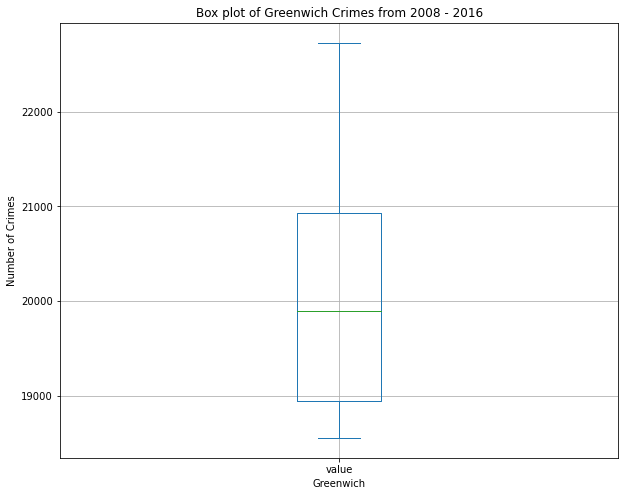

In [33]:
df_gwh.plot(kind='box', figsize=(10, 8))

plt.title('Box plot of Greenwich Crimes from 2008 - 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Greenwich')
plt.grid(True)

plt.show()

Interpretasi : Dari grafik kita dapat membuat beberapa informasi penting yaitu nilai minimum adalah sekitar 18500, nilai maksimum sekitar 22700, dan nilai median sebesar 19894. 25% dari jumlah kejahatan di Greenwich selama 2008 - 2016 mempunyai toal kejahatan tahunan sekitar 18900, dan 75% dari jumlah kejahatan di Greenwich selama 2008 - 2016 mempunyai toal kejahatan tahunan sekitar 20900.

In [34]:
# cek dengan describe()
df_gwh.describe()

,value
count,9.000000
mean,20174.222222
std,1466.644365
min,18552.000000
25%,18948.000000
50%,19894.000000
75%,20929.000000
max,22730.000000


### Scatter Plot

Kita akan mencoba memvisualisasikan tren total kejahatan dari seluruh wilayah di London di sepanjang tahun selama 2008 - 2016.

In [35]:
# Step 1 : Buat df baru yang berisi year, month, dan value
# groupby year dan month dan sum kolom value
df_total = df[['year', 'value', 'month']].groupby(['year', 'month'], as_index=False).sum()
df_total

,year,month,value
0,2008,1,65419
1,2008,2,62626
2,2008,3,61343
3,2008,4,59640
4,2008,5,62587
...,...,...,...
103,2016,8,62666
104,2016,9,61412
105,2016,10,63405
106,2016,11,61064


In [36]:
# Step 2 : rename column value menjadi total agar lebih sesuai
df_total.rename(columns={'value' :'total'}, inplace=True)

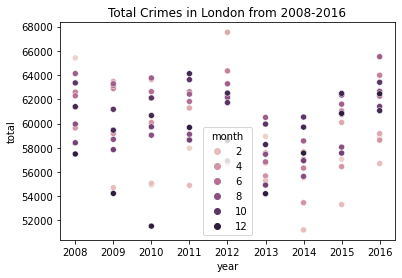

In [37]:
# Step 3 : Visualisasikan df_total, disini digunakan seaborn karena lebih mudah dan menarik
sns.scatterplot(data=df_total, x='year', y='total', hue='month')
plt.title('Total Crimes in London from 2008-2016')
plt.show()

Interpretasi : Dari hasil scatter plot total kejahatan dari seluruh wilayah London di sepanjang tahun sejak 2008 - 2016 menunjukkan bahwasannya jumlah kejahatan tertinggi sebesar hampir 68.000 kejahatan pernah terjadi pada bulan april 2012. Jika diamati secara menyeluruh, total kejahatan cenderung tinggi/meningkat saat akhir tahun menuju awal tahun.

## Visualisasi Menengah 1

### Word Cloud

In [38]:
# Import package and set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

print ('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [39]:
# set stopword untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

In [40]:
# Total kejahatan dari 2008 - 2016
total_crimes = df['value'].sum()
total_crimes

6447758

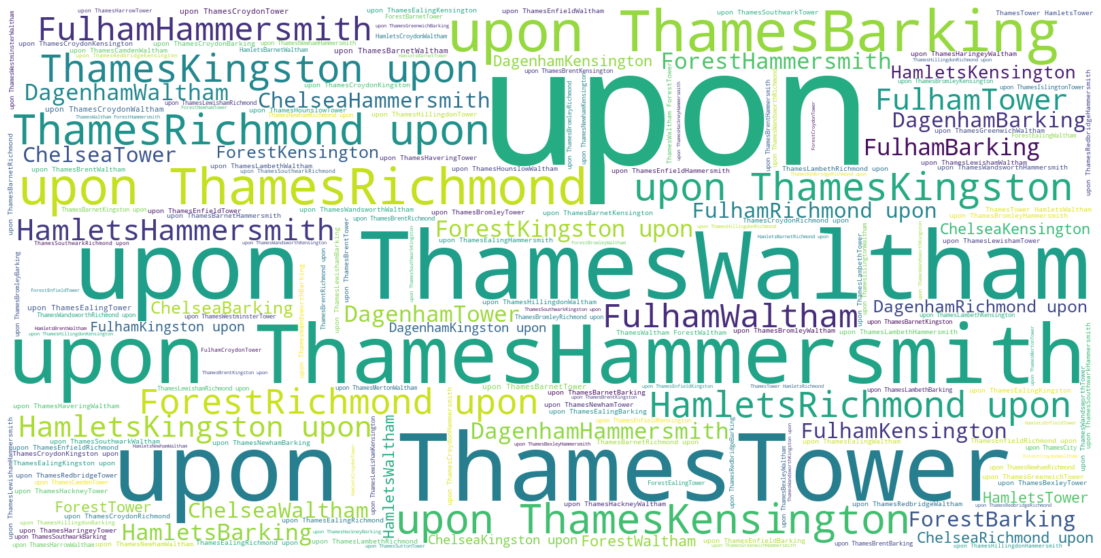

In [41]:
# Create wordcloud
wordcloud = WordCloud(stopwords = stopwords, width=1600, height=800, background_color='white').generate(''.join(df['borough']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

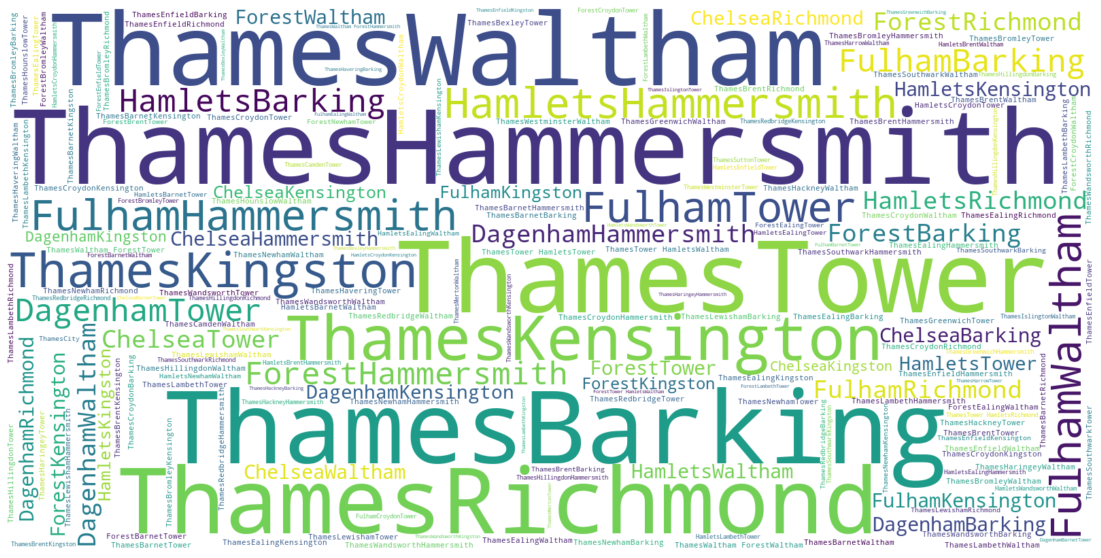

In [42]:
# upon bukanlah kata yang informatif jadi akan dtambahkan ke stopwords
stopwords.add('upon') # menambah kata upon ke stopwords

# buat ulang cloud
wordcloud = WordCloud(stopwords = stopwords, width=1600, height=800, background_color='white').generate(''.join(df['borough']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Agar terlihat menarik kita juga dapat menggunakan mask.
link download mask https://github.com/Desifitriyani05/H8_4/blob/main/alice_mask.png

In [43]:
# add mask
alice_mask = np.array(Image.open('alice_mask.png'))
print('Image downloaded and saved')

Image downloaded and saved


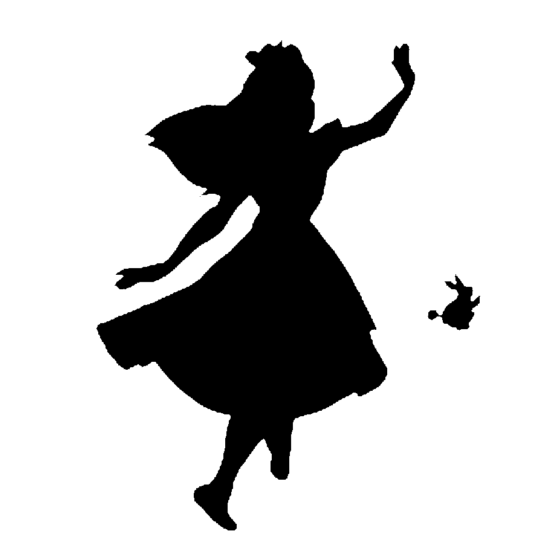

In [44]:
# display the mask
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

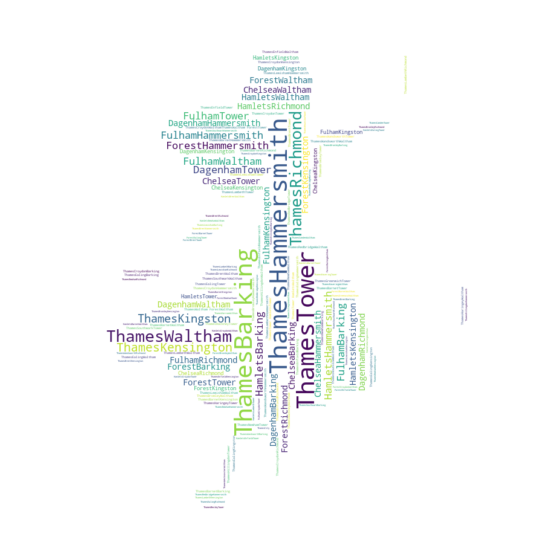

In [47]:
# wordcloud dengan mask
alice_wc = WordCloud(stopwords = stopwords, width=1600, height=800, mask=alice_mask, background_color='white').generate(''.join(df['borough']))
plt.figure(figsize=(20, 10))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualisasi Menengah 2

### Folium

In [48]:
# Import library
import folium

print('Folium installed and imported')

Folium installed and imported


Kita akan membuat peta yang berpusat di sekitar London. Karena pada dataset tidak dicantumkan longitude dan latitude wilayah London, disini saya menggunakan web https://www.latlong.net/ untuk mendapatkan longitude dan latitude secara manual.

In [49]:
# London latitude and longitude values
latitude = 51.507351
longitude = -0.127758

In [50]:
# define the london map
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# display m
m

##### Map with Markers

Kita akan membuat marker pada 10 wilayah dengan jumlah kejahatan tertinggi.

In [51]:
# Kita akan menggunakan df_top yang sudah dibuat untuk bar plot
df_top10 = df_top.head(10)
df_top10

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


Untuk mendapatkan longitude dan latitude dari 10 wilayah di atas, saya membuat file baru melalui geojson dalam bentuk csv yang berisi informasi longitude dan latitude dari 10 wilayah di atas.

https://github.com/Desifitriyani05/H8_4/blob/main/points.csv

In [52]:
# read data point.csv dan simpan dalam df baru
df_maps = pd.read_csv('points.csv')
df_maps

,lon,lat
0,-0.137008,51.497947
1,-0.117076,51.502123
2,-0.103088,51.503181
3,-0.139113,51.542376
4,0.035258,51.537069
5,-0.101231,51.370953
6,-0.305237,51.512674
7,-0.099989,51.538378
8,-0.042906,51.519058
9,-0.246281,51.549545


In [53]:
# Visualisasikan 
# instantiate a feature group for the incident in the dataframe
crimes = folium.map.FeatureGroup()

for lat, lng, in zip(df_maps.lat, df_maps.lon):
    crimes.add_child(
    folium.Marker(
    [lat, lng],
    radius=5,
    fill=True,
    fill_color='yellow',
    fill_opacity=0.6
    )
)
    
m.add_child(crimes)

## Overall Analysis

Secara keseluruhan dapat disimpulkan bahwa tahun 2016 merupakan tahun dengan jumlah kejahatan tertinggi, namun jika dilihat per bulan kejahatan tertinggi terjadi pada bulan April 2012. Wilayah dengan jumlah kejahatan tertinggi adalah Westminster, dan presentase kategori kejahatan terbesar adalah Theft and Handling.